# Data Preparation

In [1]:
import os
import shutil

# Define the path to the downloaded dataset
dataset_path = "C:/Users/medoh/OneDrive/Desktop/Dataset"

# Define the path where you want to organize the data
organized_data_path = "C:/Users/medoh/OneDrive/Desktop/Organized_Dataset"

# Create folders for each class/category
classes = ["class1", "class2"]  # Replace class1, class2, etc. with actual class names

for class_name in classes:
    os.makedirs(os.path.join(organized_data_path, class_name), exist_ok=True)

# Move images to their respective class folders
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):  # Adjust the extension based on the actual file format
        # Determine the class of the image based on its filename or any other method
        # Here, we are assuming the filename contains the class name
        class_name = filename.split("_")[0]  # Adjust this based on the naming convention of your dataset
        
        # Copy the image to the corresponding class folder
        shutil.copy(os.path.join(dataset_path, filename), os.path.join(organized_data_path, class_name))

print("Data organized successfully.")


Data organized successfully.


# Model Building

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Define input shape and number of classes
input_shape = (150, 150, 3)  # Adjust dimensions as per your images
num_classes = 2  # Number of classes (footwear and fashion/clothes)


# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)    

# vTraining & Validation & Fine-Tuning

In [17]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define constants
TRAINING_DIR = 'C:/Users/medoh/OneDrive/Desktop/Organized_Dataset/train'
VALIDATION_DIR = 'C:/Users/medoh/OneDrive/Desktop/Organized_Dataset/validation'
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_EPOCHS = 10
FINE_TUNING_EPOCHS = 10

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No augmentation for validation data, just rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Adjust to 2 output neurons for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the initial dataset
history_initial = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))

# Unfreeze certain layers of the model for fine-tuning
model.trainable = True

# Compile the model for fine-tuning
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model on the combined dataset
history_fine = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=NUM_EPOCHS + FINE_TUNING_EPOCHS,  # Total epochs for fine-tuning
    initial_epoch=NUM_EPOCHS,  # Start from the last epoch of initial training
    validation_data=validation_generator,
    validation_steps=len(validation_generator))


Found 1569 images belonging to 2 classes.
Found 1377 images belonging to 2 classes.
Epoch 1/10
50/50 [==============================] - 142s 3s/step - loss: 0.3988 - accuracy: 0.8273 - val_loss: 0.2483 - val_accuracy: 0.9216
Epoch 2/10
50/50 [==============================] - 201s 4s/step - loss: 0.1227 - accuracy: 0.9611 - val_loss: 0.1654 - val_accuracy: 0.9601
Epoch 3/10
50/50 [==============================] - 192s 4s/step - loss: 0.0879 - accuracy: 0.9802 - val_loss: 0.1243 - val_accuracy: 0.9637
Epoch 4/10
50/50 [==============================] - 168s 3s/step - loss: 0.0996 - accuracy: 0.9745 - val_loss: 0.1241 - val_accuracy: 0.9680
Epoch 5/10
50/50 [==============================] - 157s 3s/step - loss: 0.0784 - accuracy: 0.9834 - val_loss: 0.1158 - val_accuracy: 0.9695
Epoch 6/10
50/50 [==============================] - 122s 2s/step - loss: 0.0770 - accuracy: 0.9822 - val_loss: 0.1250 - val_accuracy: 0.9724
Epoch 7/10
50/50 [==============================] - 105s 2s/step - los

# save the model

In [22]:
from tensorflow.keras.models import load_model

# Save the model 
model.save('trained_model_5.h5')

# Testing

1/1 [==============================] - 0s 47ms/step


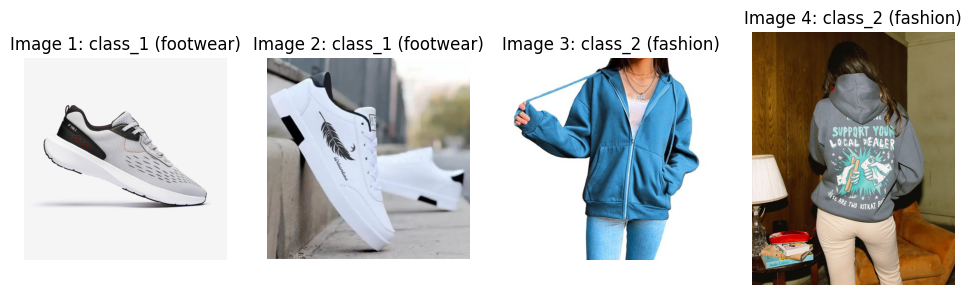

In [44]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('trained_model_5.h5')

# Define the classes
classes = {0: 'class_1 (footwear)', 1: 'class_2 (fashion)'}

# Load and preprocess the images
image_paths = [
    "C:/Users/medoh/OneDrive/Desktop/men-s-running-shoes-jogflow-1001-black-grey.jpg",
    "C:/Users/medoh/OneDrive/Desktop/8-white-leaf-8-urbanbox-white-black-original-imagvgf4cuzs2hrw.webp",
    "C:/Users/medoh/OneDrive/Desktop/1.jpg",
    "C:/Users/medoh/OneDrive/Desktop/local-dealer-hoodie-statement-hoodies-in-your-shoe-212699.webp"
]

images = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize pixel values
    images.append((img_array, img_path))

# Predict the classes for the images
plt.figure(figsize=(12, 4))
for i, (img_array, img_path) in enumerate(images, start=1):
    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]
    
    # Plot the image
    plt.subplot(1, len(images), i)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Image {i}: {predicted_class}")
    plt.axis('off')

plt.show()
